The Seismometer Equation

In [8]:
# some initialisations

f0=1 # Eigenfrequency of seismometer
from math import pi
w=2*pi*f0 # Angular frequency in radians
dt=.01 # Time increment for numerical scheme
fu0=input('Give frequency of forcing (e.g. f=1 Hz) : ') # Central frequency of forcing
h=input('Give damping parameter (e.g. h=0.5) : ') # Damping 

Give frequency of forcing (e.g. f=1 Hz) : 1
Give damping parameter (e.g. h=0.5) : 0.5


In [15]:
# Initialize ground motion

import numpy as np

q=1/int(fu0)
p=float(q)
nts=2.0*(p/dt)
t0=p/dt
aricker=4/q
nt=int(nts)
t=np.empty([nt+1])
time=np.empty([nt+1])
uii=np.empty([nt+1])

for it in range(1,nt+1):
    t=it-int(t0)
    time=float(t)*dt
    from math import exp
    uii[it]=-2*aricker*time*exp(-(aricker*time)**2)

In [16]:
# Initial condition

%matplotlib inline                       

from __future__ import print_function, division  
import matplotlib.pyplot as plt

fig = plt.figure()
plt.style.use('ggplot')                            
plt.rcParams['figure.figsize'] = 12, 8    

In [17]:
# End initialize ground motion

ntt=int(5*1/int(fu0)/dt) # total number of time steps
src=np.empty([ntt+1])
l=len(uii)
src1=np.zeros([ntt+1-l])
src=np.append(uii,src1)
hi=float(h)
eps=hi*w
x=np.empty([ntt+1])
xnow=0
xold=0
xnew=0


In [18]:
for i in range(0,ntt+1):
        if i==0: 
            xold==xnow
            continue
        #print(i, src[i])
        xnew=(1./((1./(dt**2))+(eps/dt))) * (-src[i]-((w**2)*xnow)+(((2*eps)/(2*dt))*xold)-((xold-(2*xnow))/(dt**2)))
        xold=xnow
        xnow=xnew
        x[i]=xnow
        xm=max(abs(x))
        srcm=max(src)
        y=np.empty([ntt+1])
        yy=np.empty([ntt+1])
        y=np.divide(x,xm)
        yy=np.divide(src,srcm)

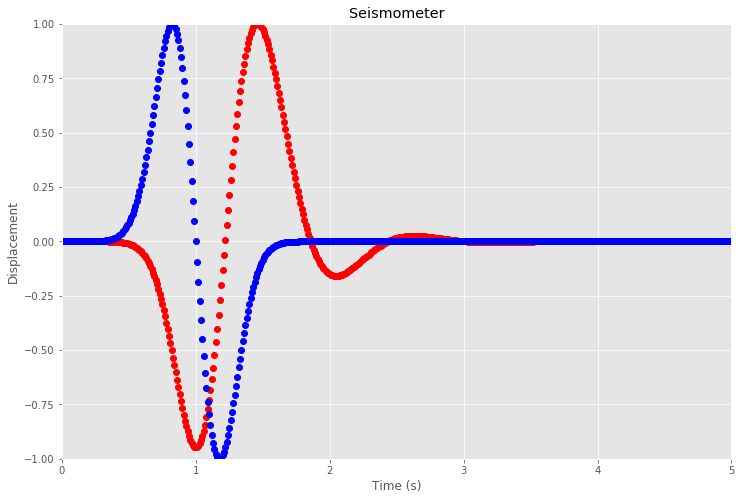

In [13]:
xa=np.arange(0,(ntt+1))
xaa=xa*dt
plt.plot(xaa, y, 'ro',linewidth=0.5)
plt.plot(xaa, yy, 'bo', linewidth=0.5)
plt.axis([0, (ntt*dt), -1, 1]) 
plt.title('Seismometer')
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
plt.show()